### MLP Model 5 (100-256-1) using STFT Dataset

In [1]:
#Importing essential libraries
from sklearn.datasets import fetch_openml

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import cv2
import random 
import math
import pandas as pd

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D,Conv2D,MaxPooling1D,Flatten,Dense,Dropout,BatchNormalization, GRU, LSTM, RNN
from tensorflow.keras import regularizers as reg

import tensorflow as tf
from tensorflow import keras
import pickle

In [2]:
# Importing the Training data from pickle file 
pickle_in = open("X_train_T2.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train_T2.pickle","rb")
y_train = pickle.load(pickle_in)

In [3]:
print('X_train :', X_train.shape)
print('y_train :', y_train.shape)

X_train : (4431, 100)
y_train : (4431,)


In [4]:
X_train=X_train.replace([np.inf, -np.inf, np.nan], 0)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

In [8]:
#Adaptive Learning Rate
from tensorflow.keras.callbacks import LearningRateScheduler
def step_decay(epoch):
   initial_lrate = 0.001 #Setting the initial learning rate to 0.001 
   drop = 0.5
   epochs_drop = 5.0  #Drops the learning rate to half after every 10 epochs
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate
lrate = LearningRateScheduler(step_decay)

In [9]:
#In Model 5 , same architecture of Model4 with Adaptive Learning Rate for Adam Optimizer 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(100,input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256,activation='relu'))

# The Output Layer :
NN_model.add(Dense(1,activation='linear'))

# Compile the network :
#sgd = SGD(learning_rate=0.001)
opt = keras.optimizers.Adam(learning_rate=0.001)
NN_model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])
NN_model.summary()
early_stopping_monitor = EarlyStopping(patience=20)
callbacks_list = [early_stopping_monitor]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               25856     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 36,213
Trainable params: 36,213
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Best fit
NN_model.fit(X_train, y_train, epochs=250, batch_size=10, validation_split = 0.02 , callbacks=callbacks_list )

Epoch 1/250
435/435 [==============================] - 1s 1ms/step - loss: 14612354.0000 - mean_absolute_error: 14612353.0000 - val_loss: 11236338.0000 - val_mean_absolute_error: 11236338.0000
Epoch 2/250
435/435 [==============================] - 1s 1ms/step - loss: 10288785.0000 - mean_absolute_error: 10288787.0000 - val_loss: 9434177.0000 - val_mean_absolute_error: 9434177.0000
Epoch 3/250
435/435 [==============================] - 1s 1ms/step - loss: 9074479.0000 - mean_absolute_error: 9074479.0000 - val_loss: 8955304.0000 - val_mean_absolute_error: 8955304.0000
Epoch 4/250
435/435 [==============================] - 1s 1ms/step - loss: 8404764.0000 - mean_absolute_error: 8404764.0000 - val_loss: 8532143.0000 - val_mean_absolute_error: 8532143.0000
Epoch 5/250
435/435 [==============================] - 1s 1ms/step - loss: 7885598.0000 - mean_absolute_error: 7885598.0000 - val_loss: 8077520.5000 - val_mean_absolute_error: 8077520.5000
Epoch 6/250
435/435 [============================

435/435 [==============================] - 1s 1ms/step - loss: 2743640.0000 - mean_absolute_error: 2743640.0000 - val_loss: 3948111.0000 - val_mean_absolute_error: 3948111.0000
Epoch 86/250
435/435 [==============================] - 1s 1ms/step - loss: 2700567.2500 - mean_absolute_error: 2700567.5000 - val_loss: 4387015.0000 - val_mean_absolute_error: 4387015.0000
Epoch 87/250
435/435 [==============================] - 1s 1ms/step - loss: 2679752.7500 - mean_absolute_error: 2679752.7500 - val_loss: 4378069.0000 - val_mean_absolute_error: 4378069.0000
Epoch 88/250
435/435 [==============================] - 1s 1ms/step - loss: 2726396.0000 - mean_absolute_error: 2726396.0000 - val_loss: 3946193.0000 - val_mean_absolute_error: 3946193.0000
Epoch 89/250
435/435 [==============================] - 1s 1ms/step - loss: 2694965.7500 - mean_absolute_error: 2694965.7500 - val_loss: 4183264.7500 - val_mean_absolute_error: 4183265.0000
Epoch 90/250
435/435 [==============================] - 1s 1ms/

Epoch 128/250
435/435 [==============================] - 1s 1ms/step - loss: 2265539.5000 - mean_absolute_error: 2265539.5000 - val_loss: 3504301.7500 - val_mean_absolute_error: 3504301.7500
Epoch 129/250
435/435 [==============================] - 1s 1ms/step - loss: 2305456.2500 - mean_absolute_error: 2305456.2500 - val_loss: 3454902.7500 - val_mean_absolute_error: 3454902.7500
Epoch 130/250
435/435 [==============================] - 0s 1ms/step - loss: 2226925.2500 - mean_absolute_error: 2226925.2500 - val_loss: 3528742.7500 - val_mean_absolute_error: 3528742.7500
Epoch 131/250
435/435 [==============================] - 1s 1ms/step - loss: 2209156.2500 - mean_absolute_error: 2209156.5000 - val_loss: 3865768.7500 - val_mean_absolute_error: 3865768.7500
Epoch 132/250
435/435 [==============================] - 1s 1ms/step - loss: 2232358.5000 - mean_absolute_error: 2232358.5000 - val_loss: 3464991.2500 - val_mean_absolute_error: 3464991.2500
Epoch 133/250
435/435 [======================

Epoch 171/250
435/435 [==============================] - 1s 1ms/step - loss: 2005188.0000 - mean_absolute_error: 2005188.0000 - val_loss: 3260800.7500 - val_mean_absolute_error: 3260800.7500
Epoch 172/250
435/435 [==============================] - 1s 1ms/step - loss: 1988973.7500 - mean_absolute_error: 1988973.7500 - val_loss: 3179681.5000 - val_mean_absolute_error: 3179681.5000
Epoch 173/250
435/435 [==============================] - 0s 1ms/step - loss: 1975619.0000 - mean_absolute_error: 1975619.0000 - val_loss: 3180557.0000 - val_mean_absolute_error: 3180557.0000
Epoch 174/250
435/435 [==============================] - 1s 1ms/step - loss: 1970824.3750 - mean_absolute_error: 1970824.3750 - val_loss: 2980667.5000 - val_mean_absolute_error: 2980667.5000
Epoch 175/250
435/435 [==============================] - 1s 1ms/step - loss: 2025068.7500 - mean_absolute_error: 2025068.7500 - val_loss: 3178744.0000 - val_mean_absolute_error: 3178744.0000
Epoch 176/250
435/435 [======================

In [11]:
#Saving the model for Ensembling
filename = 'model_F6T2.h5'
NN_model.save(filename)

In [12]:
def plotfig (ypred, yactual, strtitle, y_max):
    plt.scatter(ypred, yactual.values.ravel())
    plt.title(strtitle)
    plt.plot([(0, 0), (y_max, y_max)], [(0, 0), (y_max, y_max)])
    plt.xlim(0, y_max)
    plt.ylim(0, y_max)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.show()

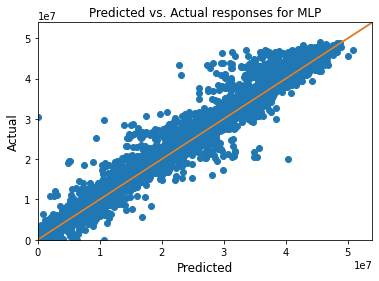

In [13]:
##Best fit line for Training data 
plotfig(NN_model.predict(X_train), y_train, 'Predicted vs. Actual responses for MLP', max(y_train) + 0.1*max(y_train))

In [14]:
#Importing the test data 
pickle_in = open("X_test_T2.pickle","rb")
X_test = pickle.load(pickle_in)

In [15]:
predictions = NN_model.predict(X_test)
print(predictions)

[[18048960.]
 [38573796.]
 [33062646.]
 ...
 [27452834.]
 [43393172.]
 [30918094.]]


In [12]:
predictions.shape

(4520, 1)

In [16]:
testsub =  pd.read_csv('C:/Datasets/predict-volcanic-eruptions-ingv-oe/sample_submission.csv')

In [14]:
#Creating Submission file to kaggle
submission = pd.DataFrame()
submission['segment_id'] = testsub['segment_id']
submission['time_to_eruption'] = predictions
submission.to_csv('submission_MLP_121320_F6T2.csv', header=True, index=False)